In [ ]:
!pip install datasets torch

In [5]:
import torch
import torch.nn.functional as F
from datasets import load_dataset
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt

In [14]:
ds = (load_dataset("mnist").with_format("torch")
      .map(lambda el: {"image": el["image"] / 255., "label": el["label"]})
     )

Found cached dataset mnist (/Users/rdilip/.cache/huggingface/datasets/mnist/mnist/1.0.0/fda16c03c4ecfb13f165ba7e29cf38129ce035011519968cdaf74894ce91c9d4)


  0%|          | 0/2 [00:00<?, ?it/s]

Loading cached processed dataset at /Users/rdilip/.cache/huggingface/datasets/mnist/mnist/1.0.0/fda16c03c4ecfb13f165ba7e29cf38129ce035011519968cdaf74894ce91c9d4/cache-dd720a353c7199f9.arrow
Loading cached processed dataset at /Users/rdilip/.cache/huggingface/datasets/mnist/mnist/1.0.0/fda16c03c4ecfb13f165ba7e29cf38129ce035011519968cdaf74894ce91c9d4/cache-eafb1de330ccdcec.arrow


In [15]:
device = "cpu"

In [16]:
g = torch.Generator().manual_seed(10)
train_loader = DataLoader(ds["train"], batch_size=32, shuffle=True, generator=g)

inp_dim = 784
hidden_dim =100
output_dim = 10
batch_size = 32

W1 = torch.randn((inp_dim, hidden_dim), device=device, generator=g)
b1 = torch.randn((hidden_dim), device=device, generator=g)

W2 = torch.randn((hidden_dim, output_dim), device=device, generator=g)
b2 = torch.randn((output_dim,), device=device, generator=g)

parameters = [W1, b2, W2, b2]
for p in parameters:
    p.requires_grad = True

In [ ]:
next(iter(train_loader))["image"].shape

torch.Size([32, 28, 28])

In [39]:
max_steps = 1000
lr = 0.1
lossi = []
stepsi = []
step = 0
training = True


for i in range(max_steps):
    
while training:
    for i, el in enumerate(train_loader):
        x, y = el["image"].view((batch_size, -1)).to(device), el["label"].to(device)
        hpreact = x @ W1 + b1
        h = hpreact.tanh()
        logits = h @ W2 + b2
        probs = logits.softmax(1)

        loss = -probs[y].log().mean()

        for p in parameters:
            p.grad = None

        loss.backward()
        for p in parameters: 
            p.data += -lr * p.grad
        
        if step % 100 == 0:
            print(f"Step: {step}: {loss.item():.4f}")
            
        if step > max_steps:
            training = False
            break
            
        lossi.append(loss.item())
        stepsi.append(step)
        step += 1


Step: 0: 12.5446
Step: 100: 9.1520
Step: 200: 6.4949
Step: 300: 5.2571
Step: 400: 3.9313
Step: 500: 3.7718
Step: 600: 3.0449
Step: 700: 3.2291
Step: 800: 2.8406
Step: 900: 2.7698
Step: 1000: 2.5492


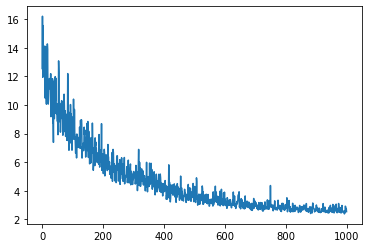

In [40]:
plt.plot(stepsi, lossi)